# COMP 4830 and 5500 Project 

## Instructions:
On this project, you can work alone or with one of your friends. Everyone needs to submit their project on ELEARN no matter it is done as a team or alone. In the report, write the names of all the students worked in this project. Put all files, source codes and your results in <span style="color:red">jupyter notebook file</span> and name it as LASTNAME_Project.ipynb  and submit it through eLearn. Any different form of submission will lose 10 points. Any kind of plagiarism is prohibited. Any late submission will lose 20 points.


Please enter your name: <strong> Kanchan Luitel</strong>  <br>
Your team members name: <strong> Yashesh Satyaprasad Gurrala </strong> <br>

## Project Description
The palmerpenguins data contains size measurements for three penguin species observed on three islands in the Palmer Archipelago, Antarctica.

The dataset consists of 7 columns.

species: penguin species (Chinstrap, Adélie, or Gentoo)<br>
bill_length_mm: bill length (mm)<br>
bill_depth_mm: bill depth (mm)<br>
flipper_length_mm: flipper length (mm)<br>
body_mass_g: body mass (g)<br>
island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)<br>
sex: penguin sex<br>


<table><tr>
<td> <img src="culmen.png" alt="Drawing" style="width: 250px;"/> </td>
<td> <img src="bodyparts.png" alt="Drawing" style="width: 250px;"/> </td>
</tr></table>

## Part 1 Preparing the Data (10 Points)

Clear the data by removing all the missing data features <br>
Choose only the Adelie and Gentoo species data <br>
Drop 'rowid', 'island', 'sex', 'year' <br>
Reset the index <br>
Create another data frame for pca which has only the 'bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g' <br> 
Draw a sublpot which shows all the 2D plots of the combinations of the various features (It will be a 2x3 and will show all the combinations of features such as bill_length_mm vs bill_depth_mm or bill_depth_mm vs body_mass_g <br>
Your Code:

In [98]:
#include all the modules here
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.cluster import KMeans


import warnings
warnings.filterwarnings('ignore')

# load in the dataset into a pandas dataframe and show the size of the file and show the first 5 rows of the data
originaldata = pd.read_csv(r'penguins.csv')
print(originaldata.shape)
originaldata.head()

# Drop Missing Values
df = originaldata.dropna()
print(df.shape)
df.head()

#choose only species : Adelie & Gentoo 
subsetdf = df[df["species"].isin(['Adelie', 'Gentoo'])]
print(subsetdf.shape)
subsetdf.head()

subsetdf = subsetdf.reset_index(drop=True)
subsetdf.head()

sex_island_df = subsetdf[['sex', 'island']]

subsetdf = subsetdf.drop(['rowid', 'island', 'sex', 'year'], axis=1)
print(f"Shape after dropping few columns: {subsetdf.shape}")
subsetdf.head()

# subsetdf = subsetdf.reset_index(drop=True)
# subsetdf.head()

pcadf = subsetdf[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']]
print(pcadf.shape)
pcadf.head()


(344, 9)
(333, 9)
(265, 9)
Shape after dropping few columns: (265, 5)
(265, 4)


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,36.7,19.3,193.0,3450.0
4,39.3,20.6,190.0,3650.0


<IPython.core.display.Javascript object>


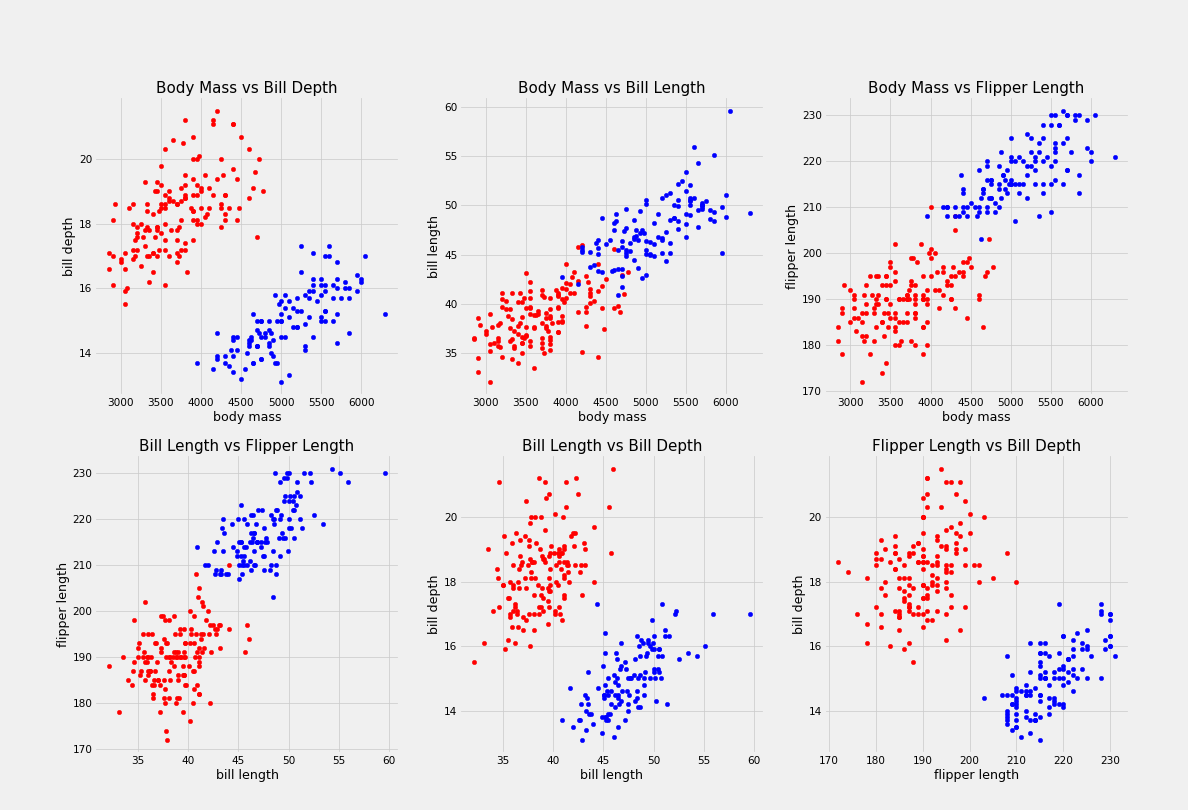

In [99]:
# plt.figure()
# plt.scatter(subsetdf[subsetdf.species=="Adelie"].body_mass_g, subsetdf[subsetdf.species=="Adelie"].bill_depth_mm,color='r')
# plt.scatter(subsetdf[subsetdf.species=="Gentoo"].body_mass_g, subsetdf[subsetdf.species=="Gentoo"].bill_depth_mm,color='b')


# subplot 2x3
# draw body_mass_g vs. bill_depth_mm
# draw bill_length_mm vs bill_depth_mm
# draw bill_length_mm vs body_mass_g.
# ....
fig,a =  plt.subplots(2,3, figsize=(22, 15))


a[0][0].scatter(subsetdf[subsetdf.species=="Adelie"].body_mass_g, subsetdf[subsetdf.species=="Adelie"].bill_depth_mm,color='r')
a[0][0].scatter(subsetdf[subsetdf.species=="Gentoo"].body_mass_g, subsetdf[subsetdf.species=="Gentoo"].bill_depth_mm,color='b')
a[0][0].set_xlabel("body mass")
a[0][0].set_ylabel("bill depth")
a[0][0].set_title("Body Mass vs Bill Depth")


a[0][1].scatter(subsetdf[subsetdf.species=="Adelie"].body_mass_g, subsetdf[subsetdf.species=="Adelie"].bill_length_mm,color='r')
a[0][1].scatter(subsetdf[subsetdf.species=="Gentoo"].body_mass_g, subsetdf[subsetdf.species=="Gentoo"].bill_length_mm,color='b')
a[0][1].set_xlabel("body mass")
a[0][1].set_ylabel("bill length")
a[0][1].set_title("Body Mass vs Bill Length")


a[0][2].scatter(subsetdf[subsetdf.species=="Adelie"].body_mass_g, subsetdf[subsetdf.species=="Adelie"].flipper_length_mm,color='r')
a[0][2].scatter(subsetdf[subsetdf.species=="Gentoo"].body_mass_g, subsetdf[subsetdf.species=="Gentoo"].flipper_length_mm,color='b')
a[0][2].set_xlabel("body mass")
a[0][2].set_ylabel("flipper length")
a[0][2].set_title("Body Mass vs Flipper Length")

a[1][0].scatter(subsetdf[subsetdf.species=="Adelie"].bill_length_mm, subsetdf[subsetdf.species=="Adelie"].flipper_length_mm,color='r')
a[1][0].scatter(subsetdf[subsetdf.species=="Gentoo"].bill_length_mm, subsetdf[subsetdf.species=="Gentoo"].flipper_length_mm,color='b')
a[1][0].set_xlabel("bill length")
a[1][0].set_ylabel("flipper length")
a[1][0].set_title("Bill Length vs Flipper Length")


a[1][1].scatter(subsetdf[subsetdf.species=="Adelie"].bill_length_mm, subsetdf[subsetdf.species=="Adelie"].bill_depth_mm,color='r')
a[1][1].scatter(subsetdf[subsetdf.species=="Gentoo"].bill_length_mm, subsetdf[subsetdf.species=="Gentoo"].bill_depth_mm,color='b')
a[1][1].set_xlabel("bill length")
a[1][1].set_ylabel("bill depth")
a[1][1].set_title("Bill Length vs Bill Depth")

a[1][2].scatter(subsetdf[subsetdf.species=="Adelie"].flipper_length_mm, subsetdf[subsetdf.species=="Adelie"].bill_depth_mm,color='r')
a[1][2].scatter(subsetdf[subsetdf.species=="Gentoo"].flipper_length_mm, subsetdf[subsetdf.species=="Gentoo"].bill_depth_mm,color='b')
a[1][2].set_xlabel("flipper length")
a[1][2].set_ylabel("bill depth")
a[1][2].set_title("Flipper Length vs Bill Depth")

plt.show()


#### Discuss which of the two features are good to be used to classify these two species? 


Your Answer: Visually, scatter plots (0, 0) and (1, 2) show greater separation of the two species. So corresponding features ((Body mass, Bill Depth)  and (Flipper Length, Bill Depth)) are good features to be used to classify these species. 

## Part 2 PCA
Apply PCA to the data <br>
Find and figure out how many principal components are good to choose for classification <br>
Draw a 2-D and 3-D graphs using the best principal components (choose best 2 principal components for 2D and choose best 3 for the 3D plots)  <br>
Your code:

In [100]:
data = pcadf

scaled_data = preprocessing.scale(data)

pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

per_var = np.round(pca.explained_variance_ratio_ * 100,  decimals = 2)

labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]

# scree plot 
plt.bar(x=range(1, len(per_var) + 1), height=per_var, tick_label=labels)
plt.ylabel('Percentage explained by variance')
plt.xlabel('Principal component')
plt.title('Scree Plot')
plt.show()

print('Percentage value of Principal components: ' +  str(per_var))
print()

pca_df = pd.DataFrame(pca_data, columns=labels)

import random as rd 

color_list = [ '#68227E', '#15BBD9', '#42C268', '#503F21', '#5EABB1', '#6E4F32']

species_unique_list = subsetdf.species.unique().tolist()

species_list = subsetdf.species.tolist()


# scatter plot each row of (PC1, PC2)
for sample in pca_df.index:   
    index = species_unique_list.index(species_list[sample])
    s = plt.scatter(pca_df.PC1.loc[sample], pca_df.PC2.loc[sample], 
                           color= color_list[index])
    
for l in set(species_unique_list):
    plt.scatter([],[], color=color_list[species_unique_list.index(l)], label=l)
plt.legend()

Percentage value of Principal components: [79.43 14.95  3.25  2.37]



265


<IPython.core.display.Javascript object>


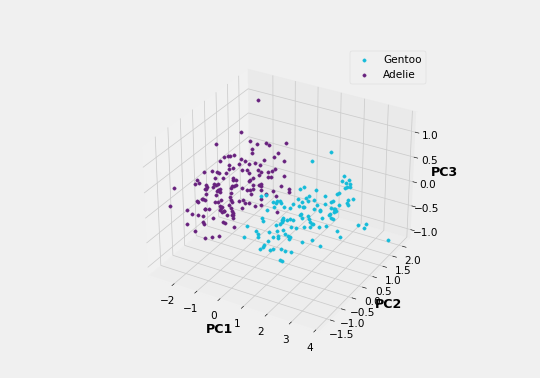

In [101]:
from mpl_toolkits.mplot3d import axes3d
%matplotlib notebook

data = (pca_df.PC1.tolist(), pca_df.PC2.tolist(), pca_df.PC3.tolist())
# colors = ("red", "green")
# groups = ("bird1", "bird2") 
print(len(data[0]))

# Create plot
# fig = plt.figure()
# ax = fig.add_subplot(1, 1, 1, facecolor="1.0")
# ax = fig.gca(projection='3d')

# for data, color, group in zip(data, colors, groups):
#     x, y, z = data
#     ax.scatter(x, y, z, alpha=0.8, c=color, edgecolors='none', s=30, label=group)

# plt.title('Matplot 3d scatter plot')
# plt.legend(loc=2)
# plt.show()


fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Create Plot

for sample in pca_df.index:   
    index = species_unique_list.index(species_list[sample])
    s = ax.scatter3D(pca_df.PC1.loc[sample], pca_df.PC2.loc[sample], pca_df.PC3.loc[sample],
                           color= color_list[index])
    
for l in set(species_unique_list):
    ax.scatter3D([],[], color=color_list[species_unique_list.index(l)], label=l)
plt.legend()

# Add axis

ax.set_xlabel('PC1', fontweight ='bold')
ax.set_ylabel('PC2', fontweight ='bold')
ax.set_zlabel('PC3', fontweight ='bold')

plt.show()

#### Discuss your results? In terms of classification, compare the results from pca vs part 1 subplots? Does PCA helps us to classify better or not? Explain it. 

Your Answer:

## Part 3 Kmeans
Apply Kmeans to the PCA Data and plot the results <br>
Your code:

<IPython.core.display.Javascript object>


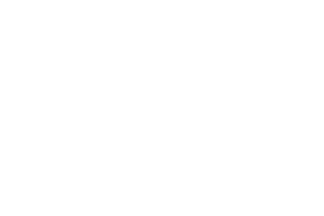

In [102]:
# deciding on the number of k by using elbow curve

# linear data
pc1 = np.array(pca_df.PC1)
pc2 = np.array(pca_df.PC2)

# need to convert into 2D array
training_X = np.vstack((pc1, pc2)).T

#setting up k-means parameters 
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the Sum-Squared Error(SSE) values for each k
sse = []
max_k = 20
for k in range(1, max_k):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(training_X)
    sse.append(kmeans.inertia_)

# print(sse)

plt.clf()
plt.cla()
plt.close()

plt.style.use("fivethirtyeight")
plt.plot(range(1, max_k), sse)
plt.xticks(range(1, max_k))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

training score: -238.45258293268174
Silhouetter Score: 0.671


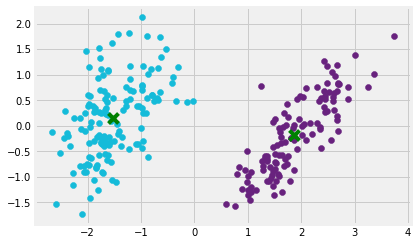

In [104]:
plt.clf()
plt.cla()
plt.close()

from sklearn import metrics

%matplotlib inline


# kmeans training with 2 classes as directed by elbow curve 
kmeans = KMeans(n_clusters=2, random_state=0, max_iter=300)
kmeans.fit(training_X)

# results
# print(kmeans.predict([[100,80], [15,35]]))
# print(kmeans.labels_)
print(f"training score: {kmeans.score(training_X)}")

# Calculate Silhoutte Score
score = metrics.silhouette_score(training_X, kmeans.labels_, metric='euclidean')
# Print the score
print('Silhouetter Score: %.3f' % score)

# plotting
plt.figure(2)
for i in range(len(pc1)):
    if kmeans.labels_[i]==0:
        plt.scatter(pc1[i], pc2[i], color=color_list[0])
    else:
        plt.scatter(pc1[i], pc2[i], color=color_list[1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, marker='x', c='green')
plt.show()

#### Discuss your results? Are you able to seperate all the species correctly with Kmeans? 

Your Answer:

## Part 4 Neural Network
Use neural network based classifier to find the members of each class using the best principal components from part 2. <br>
Your Code:

In [105]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler  


# reshaping the data is unnecessary as the data is already standardized and normalized

training_Y = species_list
class_names = species_unique_list

x_train, x_test, y_train, y_test = train_test_split(training_X, training_Y, test_size=0.30)
print(f"shape of x_train: {x_train.shape}")
print(f"shape of x_test: {x_test.shape}")
# # neural network with hidden layers
nn = MLPClassifier(solver='sgd', learning_rate='constant',learning_rate_init=0.001, hidden_layer_sizes=(20, 50), max_iter =200, random_state=1)
nn.fit(x_train, y_train )

# # results
# test_X = scaler.transform(np.array([[ 100, 80],[ 15, 35]]))
y_predict = nn.predict(x_test)
print(f"confusion matrix :\n {confusion_matrix(y_test, y_predict)} \n")
print(classification_report(y_test, y_predict, target_names=class_names))



shape of x_train: (185, 2)
shape of x_test: (80, 2)
confusion matrix :
 [[41  0]
 [ 0 39]] 

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        41
      Gentoo       1.00      1.00      1.00        39

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



## Part 5 Graduate Student (BONUS for Undergraduate Students)

Choose all the samples for species. This time use, sex data for classification. And apply the same requirements listed in part 2,3,4. Show and explain which features are the best for classification.<br>
Your Code and Discussions:

In [106]:
#Getting the Data ready with right columns 

print(f"Shape of original data : {originaldata.shape}")
# originaldata.head()

# Drop rows with Missing Values
df2 = originaldata.dropna()
print(df2.shape)
df2.head()

unique_values_species = df2["species"].unique()
print(f" All Unique Species :  {unique_values_species}")

subsetdf2 = df2.drop(['rowid', 'island', 'year', 'species'], axis=1)
print(f"Shape after dropping few columns: {subsetdf2.shape}")
print(subsetdf2.head())

pcadf2 = subsetdf2[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']]
print(pcadf2.shape)
pcadf2.head()











Shape of original data : (344, 9)
(333, 9)
 All Unique Species :  ['Adelie' 'Gentoo' 'Chinstrap']
Shape after dropping few columns: (333, 5)
   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g     sex
0            39.1           18.7              181.0       3750.0    male
1            39.5           17.4              186.0       3800.0  female
2            40.3           18.0              195.0       3250.0  female
4            36.7           19.3              193.0       3450.0  female
5            39.3           20.6              190.0       3650.0    male
(333, 4)


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


<strong> PCA </strong> <br>
Apply PCA to the data
Find and figure out how many principal components are good to choose for classification
Draw a 2-D and 3-D graphs using the best principal components (choose best 2 principal components for 2D and choose best 3 for the 3D plots)

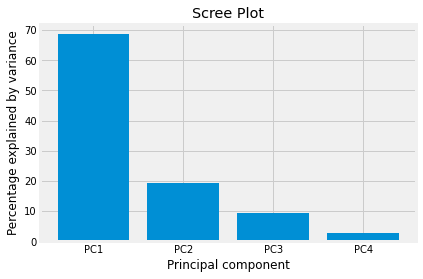

Percentage value of Principal components: [68.63 19.45  9.22  2.7 ]
 Cumulative Percentage value of Principal components : [0.69 0.88 0.97 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.  ]


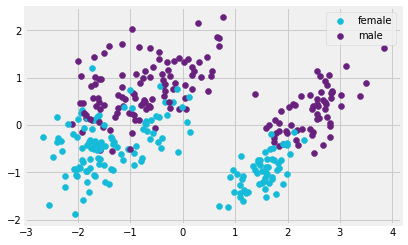

In [107]:
data2 = pcadf2

scaled_data2 = preprocessing.scale(data2)

pca2 = PCA()
pca2.fit(scaled_data2)
pca_data2 = pca.transform(scaled_data2)

per_var2 = np.round(pca2.explained_variance_ratio_ * 100,  decimals = 2)

labels2 = ['PC' + str(x) for x in range(1, len(per_var2) + 1)]

# scree plot 
plt.bar(x=range(1, len(per_var2) + 1), height=per_var2, tick_label=labels2)
plt.ylabel('Percentage explained by variance')
plt.xlabel('Principal component')
plt.title('Scree Plot')
plt.show()

print('Percentage value of Principal components: ' +  str(per_var2))
print(f" Cumulative Percentage value of Principal components : {np.array([pca2.explained_variance_ratio_[:i].sum() for i in range(1, k+1)]).round(2)}")


pca_df2 = pd.DataFrame(pca_data2, columns=labels)

import random as rd 

color_list = [ '#68227E', '#15BBD9', '#42C268', '#503F21', '#5EABB1', '#6E4F32']

sex_unique_list = subsetdf2.sex.unique().tolist()

sex_list = subsetdf2.sex.tolist()


# scatter plot each row of (PC1, PC2)
for sample in pca_df2.index:   
    index = sex_unique_list.index(sex_list[sample])
    s = plt.scatter(pca_df2.PC1.loc[sample], pca_df2.PC2.loc[sample], 
                           color= color_list[index])
    
for l in set(sex_unique_list):
    plt.scatter([],[], color=color_list[sex_unique_list.index(l)], label=l)
plt.legend()

333


<IPython.core.display.Javascript object>


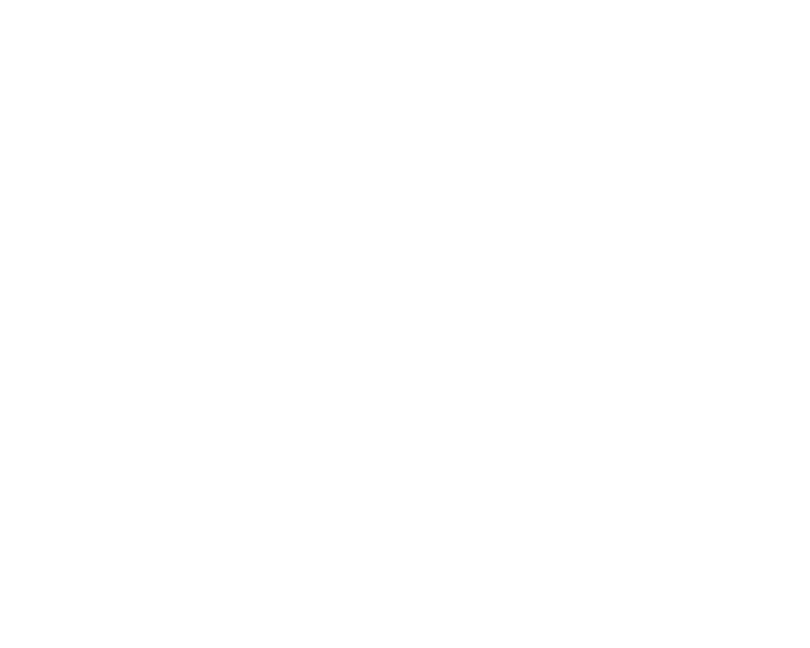

In [108]:
from mpl_toolkits.mplot3d import axes3d
%matplotlib notebook

# data_pca = (pca_df2.PC1.tolist(), pca_df2.PC2.tolist(), pca_df2.PC3.tolist())
colors = ["orange", "blue"]
# groups = ("bird1", "bird2") 
print(len(data_pca[0]))

fig = plt.figure(figsize = (15, 12))
ax = plt.axes(projection ="3d")
 
# Create Plot

for sample in pca_df2.index:   
    index = sex_unique_list.index(sex_list[sample])
    s = ax.scatter3D(pca_df2.PC1.loc[sample], pca_df2.PC2.loc[sample], pca_df2.PC3.loc[sample],
                           color= colors[index])
    
for l in set(sex_unique_list):
    ax.scatter3D([],[], color=colors[sex_unique_list.index(l)], label=l)
plt.legend()

# Add axis

ax.set_xlabel('PC1', fontweight ='bold')
ax.set_ylabel('PC2', fontweight ='bold')
ax.set_zlabel('PC3', fontweight ='bold')

plt.show()

## KMeans

<IPython.core.display.Javascript object>


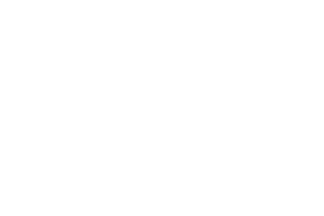

In [109]:
# deciding on the number of k by using elbow curve

# linear data
pc1_2 = np.array(pca_df2.PC1)
pc2_2 = np.array(pca_df2.PC2)
pc2_3 = np.array(pca_df2.PC3)


# need to convert into 2D array
training_X2 = np.vstack((pc1_2, pc2_2, pc2_3)).T

#setting up k-means parameters 
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the Sum-Squared Error(SSE) values for each k
sse2 = []
max_k = 20
for k in range(1, max_k):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(training_X2)
    sse2.append(kmeans.inertia_)

# print(sse)

plt.clf()
plt.cla()
plt.close()

plt.style.use("fivethirtyeight")
plt.plot(range(1, max_k), sse2)
plt.xticks(range(1, max_k))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

training score: -333.833795743412
Silhouetter Score: 0.471


<IPython.core.display.Javascript object>


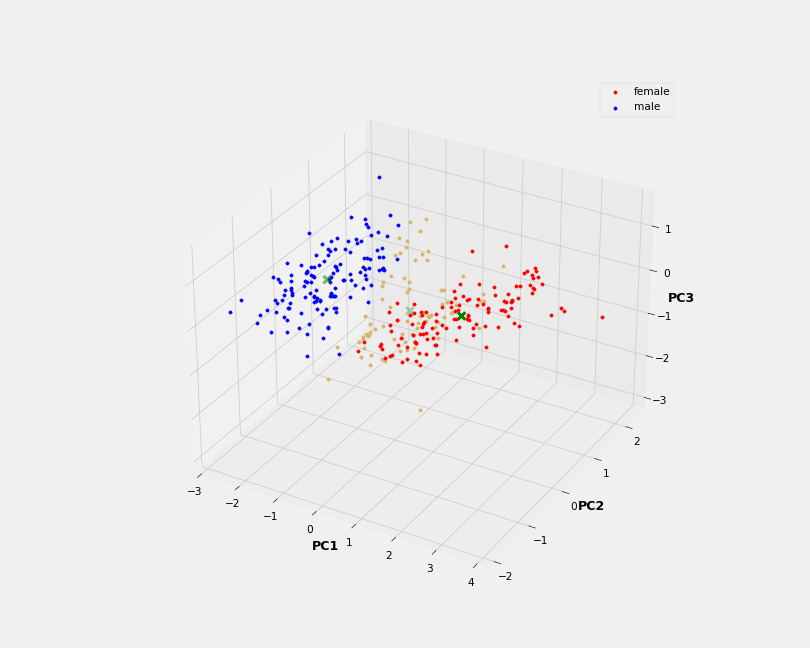

In [110]:
# K- MEANS Clustering 

plt.clf()
plt.cla()
plt.close()

# from sklearn import metrics
# from mpl_toolkits.mplot3d import axes3d
%matplotlib notebook

# kmeans training with 2 classes as directed by elbow curve 
kmeans2 = KMeans(n_clusters=3, random_state=0, max_iter=300)
kmeans2.fit(training_X2)

# results
# print(kmeans.predict([[100,80], [15,35]]))
# print(kmeans.labels_)
print(f"training score: {kmeans2.score(training_X2)}")

# Calculate Silhoutte Score
score2 = metrics.silhouette_score(training_X2, kmeans2.labels_, metric='euclidean')
# Print the score
print('Silhouetter Score: %.3f' % score2)

# print(f"labels: {kmeans2.labels_}")

# plotting

fig = plt.figure(figsize = (15, 12))
ax = plt.axes(projection ="3d")
colors_list2 = ['blue', 'red', '#d8b365']
 
for i in range(len(pc1_2)):
    if kmeans2.labels_[i]==0:
        ax.scatter3D(pc1_2[i], pc2_2[i], pc2_3[i], color=colors_list2[0])
    elif kmeans2.labels_[i]==1:
        ax.scatter3D(pc1_2[i], pc2_2[i], pc2_3[i], color=colors_list2[1])
    else:
        ax.scatter3D(pc1_2[i], pc2_2[i], pc2_3[i], color=colors_list2[2])
        
ax.scatter3D(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:, 1], kmeans2.cluster_centers_[:, 2], s=100, marker='x', c='green')

  
for l in set(sex_unique_list):
    ax.scatter3D([],[], color=colors_list2[sex_unique_list.index(l)], label=l)
plt.legend()

#Add axis

ax.set_xlabel('PC1', fontweight ='bold')
ax.set_ylabel('PC2', fontweight ='bold')
ax.set_zlabel('PC3', fontweight ='bold')

plt.show()



## NeuralNetwork 

In [111]:
# Neural Network using 4 feature vectors 
training_Y2 = sex_list
class_names2 = sex_unique_list

x_train2, x_test2, y_train2, y_test2 = train_test_split(training_X2, training_Y2, test_size=0.30)
print(f"shape of x_train2: {x_train2.shape}")
print(f"shape of x_test2: {x_test2.shape}")
# # neural network with hidden layers
nn = MLPClassifier(solver='sgd', learning_rate='constant',learning_rate_init=0.001, hidden_layer_sizes=(20, 50), max_iter =200, random_state=1)
nn.fit(x_train2, y_train2 )

# # results
# test_X = scaler.transform(np.array([[ 100, 80],[ 15, 35]]))
y_predict2 = nn.predict(x_test2)
print(f"confusion matrix :\n {confusion_matrix(y_test2, y_predict2)} \n")
print(classification_report(y_test2, y_predict2, target_names=class_names2))




shape of x_train2: (233, 3)
shape of x_test2: (100, 3)
confusion matrix :
 [[43  3]
 [12 42]] 

              precision    recall  f1-score   support

        male       0.78      0.93      0.85        46
      female       0.93      0.78      0.85        54

    accuracy                           0.85       100
   macro avg       0.86      0.86      0.85       100
weighted avg       0.86      0.85      0.85       100



In [112]:
# Neural Network using 4 feature vectors 
# print(training_X2)
print(subsetdf2.head())
# reshaping the data

x = subsetdf2.iloc[:,[0,1,2,3]].values
y = subsetdf2.iloc[:,4].values
print(x)
print(y)

training_X = x
scaler = StandardScaler()
scaler.fit(training_X)
training_X2 = scaler.transform(training_X)  


training_Y2 = y
class_names2 = sex_unique_list

x_train2, x_test2, y_train2, y_test2 = train_test_split(training_X2, training_Y2, test_size=0.25)
print(f"shape of x_train2: {x_train2.shape}")
print(f"shape of x_test2: {x_test2.shape}")
# # neural network with hidden layers
nn = MLPClassifier(solver='sgd', learning_rate='constant',learning_rate_init=0.001, hidden_layer_sizes=(20, 50), max_iter =200, random_state=1)
nn.fit(x_train2, y_train2 )

# # results
# test_X = scaler.transform(np.array([[ 100, 80],[ 15, 35]]))
y_predict2 = nn.predict(x_test2)
print(f"confusion matrix :\n {confusion_matrix(y_test2, y_predict2)} \n")
print(classification_report(y_test2, y_predict2, target_names=class_names2))

   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g     sex
0            39.1           18.7              181.0       3750.0    male
1            39.5           17.4              186.0       3800.0  female
2            40.3           18.0              195.0       3250.0  female
4            36.7           19.3              193.0       3450.0  female
5            39.3           20.6              190.0       3650.0    male
[[  39.1   18.7  181.  3750. ]
 [  39.5   17.4  186.  3800. ]
 [  40.3   18.   195.  3250. ]
 ...
 [  49.6   18.2  193.  3775. ]
 [  50.8   19.   210.  4100. ]
 [  50.2   18.7  198.  3775. ]]
['male' 'female' 'female' 'female' 'male' 'female' 'male' 'female' 'male'
 'male' 'female' 'female' 'male' 'female' 'male' 'female' 'male' 'female'
 'male' 'male' 'female' 'male' 'female' 'female' 'male' 'female' 'male'
 'female' 'male' 'female' 'male' 'male' 'female' 'female' 'male' 'female'
 'male' 'female' 'male' 'female' 'male' 'male' 'female' 'male' 'female'
 'ma